In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing dataset

In [2]:
df=pd.read_csv('C:/Users/maade/Desktop/Pytorch/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

# feature engg
Haversine formula refer wiki for finding distance btw two co ords given latitudes n longitudes

In [4]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [5]:
df['dist_km']=haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


Now to change date time format 

In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [7]:
df['edtdate']=df['pickup_datetime']-pd.Timedelta(hours=4)
df['Hour']=df['edtdate'].dt.hour
df['AMorPM']=np.where(df['Hour']<12,'am','pm')

In [8]:

df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,edtdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [9]:
df['weekday']=df['edtdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,edtdate,Hour,AMorPM,weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


# Categorical encoding

In [10]:
cat_cols=['Hour','AMorPM','weekday']
cont_cols=['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']
y_col=['fare_amount']

for cat in cat_cols:
    df[cat]=df[cat].astype('category')


# creating numpy arrays to convert into tensors for nn

In [11]:
hr=df['Hour'].cat.codes.values
ampm=df['AMorPM'].cat.codes.values
wkdy=df['weekday'].cat.codes.values
hr


array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [12]:
cats=np.stack([hr,ampm,wkdy],axis=1)
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [13]:
cats= torch.tensor(cats,dtype=torch.int64)

In [14]:
conts=np.stack([df[col].values for col in cont_cols],axis=1)
conts=torch.tensor(conts,dtype=torch.float)

In [15]:
y= torch.tensor(df[y_col].values,dtype=torch.float)

# setting category sizes and embedding sizes for one hot encoding categories

In [16]:
catsizes=[len(df[col].cat.categories) for col in cat_cols]
catsizes

[24, 2, 7]

In [17]:
embedsizes=[(size,min(50,(size+1)//2)) for size in catsizes]
embedsizes

[(24, 12), (2, 1), (7, 4)]

embedding on 2 cat row...insight on the whole forward method..step by step breakdown

In [18]:
catz=cats[:2]

In [19]:
selfembeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedsizes])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [20]:
embeddingz= []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [21]:
embeddingz

[tensor([[ 1.1971, -2.2414,  1.3285,  0.8410, -0.8097, -0.0857,  0.4353,  0.3045,
          -1.6449,  0.4485,  0.1191, -1.5587],
         [-0.1178, -0.9422, -0.7034, -0.8774,  0.5574,  0.0477,  0.7405,  1.9160,
          -2.1470, -0.0429,  1.0688, -0.4052]], grad_fn=<EmbeddingBackward>),
 tensor([[0.2801],
         [0.2801]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.5217, -0.0492,  0.5949,  0.3284],
         [-1.3483, -1.3451, -2.3032,  1.3827]], grad_fn=<EmbeddingBackward>)]

In [22]:
z=torch.cat(embeddingz,1)
z

tensor([[ 1.1971, -2.2414,  1.3285,  0.8410, -0.8097, -0.0857,  0.4353,  0.3045,
         -1.6449,  0.4485,  0.1191, -1.5587,  0.2801, -0.5217, -0.0492,  0.5949,
          0.3284],
        [-0.1178, -0.9422, -0.7034, -0.8774,  0.5574,  0.0477,  0.7405,  1.9160,
         -2.1470, -0.0429,  1.0688, -0.4052,  0.2801, -1.3483, -1.3451, -2.3032,
          1.3827]], grad_fn=<CatBackward>)

In [23]:
selfembdrop= nn.Dropout(0.4)
z= selfembdrop(z)
z

tensor([[ 0.0000, -3.7357,  2.2141,  0.0000, -1.3495, -0.1429,  0.0000,  0.5075,
         -2.7415,  0.7474,  0.1985, -0.0000,  0.4668, -0.8695, -0.0000,  0.9915,
          0.0000],
        [-0.0000, -0.0000, -1.1724, -1.4623,  0.9290,  0.0000,  0.0000,  0.0000,
         -0.0000, -0.0000,  0.0000, -0.6753,  0.4668, -2.2471, -2.2419, -3.8387,
          2.3046]], grad_fn=<MulBackward0>)

In [42]:
class TabularModel(nn.Module):
    def __init__(self, embedsizes,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedsizes])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)
        
        layerlist=[]
        n_emb=sum([nf for ni,nf in embedsizes])
        n_in=n_emb +n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in= i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers=nn.Sequential(*layerlist)
        
    def forward(self,x_cat,x_cont):
        embeddings=[]
        #the insight section above is what happens insid this for loop
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        #combining cats and conts 
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x
        

# creating instance of model

In [43]:
torch.manual_seed(33)
model=TabularModel(embedsizes,conts.shape[1],1,[200,100],p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [44]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# train test split

In [45]:
batch_size=60000
test_size=int(batch_size*0.2)

In [46]:
#data shuffled already

cat_train= cats[:batch_size-test_size]
cat_test =cats[batch_size-test_size:batch_size]
con_train= conts[:batch_size-test_size]
con_test= conts[batch_size-test_size:batch_size]

In [47]:
y_train=y[:batch_size-test_size]
y_test= y[batch_size-test_size:batch_size]

In [30]:
len(cat_train)

48000

In [31]:
len(cat_test)

12000

In [50]:
import time
start_time=time.time()
epochs=300
losses=[]
for i in range(epochs):
    i+=1
    
    y_pred=model(cat_train,con_train)
    loss= torch.sqrt(criterion(y_pred,y_train))#RMSE
    losses.append(loss)
    
    if i%10==1:
        print(f'epoch {i} loss is {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration= time.time()-start_time
print(f'Training took {duration/60} minutes')

epoch 1 loss is 3.3759243488311768
epoch 11 loss is 3.3587918281555176
epoch 21 loss is 3.3640756607055664
epoch 31 loss is 3.3632891178131104
epoch 41 loss is 3.3475699424743652
epoch 51 loss is 3.3542497158050537
epoch 61 loss is 3.3149662017822266
epoch 71 loss is 3.331904172897339
epoch 81 loss is 3.3403985500335693
epoch 91 loss is 3.3242714405059814
epoch 101 loss is 3.2838118076324463
epoch 111 loss is 3.3071577548980713
epoch 121 loss is 3.291314125061035
epoch 131 loss is 3.286940574645996
epoch 141 loss is 3.273036003112793
epoch 151 loss is 3.2760019302368164
epoch 161 loss is 3.2719199657440186
epoch 171 loss is 3.2456605434417725
epoch 181 loss is 3.244783878326416
epoch 191 loss is 3.245105266571045
epoch 201 loss is 3.2613821029663086
epoch 211 loss is 3.2396318912506104
epoch 221 loss is 3.2276711463928223
epoch 231 loss is 3.252079725265503
epoch 241 loss is 3.2487375736236572
epoch 251 loss is 3.231227159500122
epoch 261 loss is 3.2437684535980225
epoch 271 loss is 3.

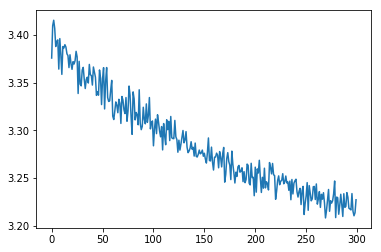

In [55]:
plt.plot(range(epochs),losses)

In [57]:
with torch.no_grad():
    y_val= model(cat_test,con_test)
    loss= torch.sqrt(criterion(y_val,y_test))
loss

tensor(3.1438)

In [60]:
for i in range(10):
    diff= np.abs(y_val[i].item()-y_test[i].item())
    print(f' {i} Predicted {y_val[i].item():8.2f} True: {y_test[i].item():8.2f} Difference: {diff}')

 0 Predicted     4.09 True:     2.90 Difference: 1.1864633560180664
 1 Predicted    21.03 True:     5.70 Difference: 15.334200859069824
 2 Predicted     5.42 True:     7.70 Difference: 2.275257110595703
 3 Predicted    12.71 True:    12.50 Difference: 0.21072769165039062
 4 Predicted     4.99 True:     4.10 Difference: 0.8866801261901855
 5 Predicted     4.58 True:     5.30 Difference: 0.722710132598877
 6 Predicted     2.49 True:     3.70 Difference: 1.2050158977508545
 7 Predicted    19.03 True:    14.50 Difference: 4.526113510131836
 8 Predicted     5.53 True:     5.70 Difference: 0.17348289489746094
 9 Predicted    10.38 True:    10.10 Difference: 0.2849912643432617


In [61]:
torch.save(model.state_dict(),'TaxiModel.pt')